In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
pip install tensorflow matplotlib numpy


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.7058 - accuracy: 0.3701 - val_loss: 1.3449 - val_accuracy: 0.5111
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.3781 - accuracy: 0.5083 - val_loss: 1.1600 - val_accuracy: 0.5922
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2505 - accuracy: 0.5582 - val_loss: 1.0542 - val_accuracy: 0.6260
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1579 - accuracy: 0.5966 - val_loss: 1.0112 - val_accuracy: 0.6430
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0803 - accuracy: 0.6240 - val_loss: 0.9578 - val_accuracy: 0.6606
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0162 - accuracy: 0.6450 - val_loss: 0.9345 - val_accuracy: 0.6774
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9703 - accuracy: 0.6637 - val_loss: 0.9246 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 6s 19ms/step - loss: 0.9087 - accuracy: 0.6941
Test accuracy: 0.694100022315979


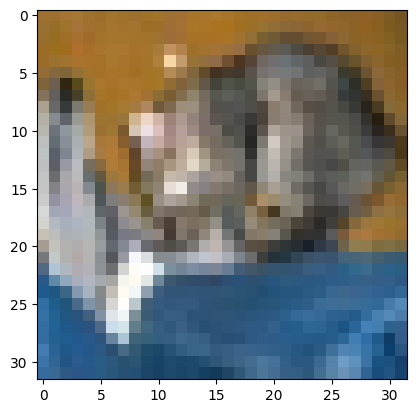

1/1 [==============================] - 0s 23ms/step
Predicted class: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image for prediction (example: the first test image)
img = test_images[0]
plt.imshow(img)
plt.show()

# Add batch dimension
img = np.expand_dims(img, axis=0)

# Predict the class
predictions = model.predict(img)
predicted_class = np.argmax(predictions)

print(f"Predicted class: {predicted_class}")


In [ ]:
import tensorflow


In [ ]:
model.save('image_classification_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
loaded_model = tf.keras.models.load_model('image_classification_model.h5')


In [12]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('image_classification_model.h5')


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(32, 32))
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [18]:
def predict_class(img_path, model):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    # Predict the probabilities for each class
    predictions = model.predict(img_array)
    # Get the index of the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the class for a new image
img_path = '/content/sample_data/deer.jpg'
predicted_class_index = predict_class(img_path, model)
predicted_class_name = class_names[predicted_class_index[0]]

print(f"The predicted class is: {predicted_class_name}")


1/1 [==============================] - 0s 29ms/step
The predicted class is: deer


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(32, 32))
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 10s 0us/step


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_datagen = datagen.flow(x_train, y_train, batch_size=64, subset='training')
val_datagen = datagen.flow(x_train, y_train, batch_size=64, subset='validation')


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


1/1 [==============================] - 0s 124ms/step


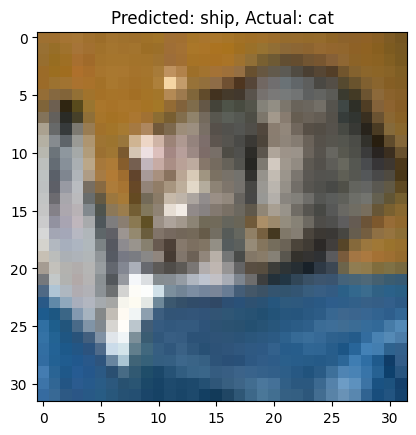

In [23]:
# Use an image from the validation set
import matplotlib.pyplot as plt

# Pick a sample from the validation set
sample_image = x_test[0]
sample_label = y_test[0]

# Preprocess the sample image (although it's already preprocessed, just to match the process)
sample_image_processed = np.expand_dims(sample_image, axis=0)

# Predict the class
predictions = model.predict(sample_image_processed)
predicted_class = np.argmax(predictions, axis=1)

# Display the sample image and the predicted class
plt.imshow(sample_image)
plt.title(f"Predicted: {class_names[predicted_class[0]]}, Actual: {class_names[np.argmax(sample_label)]}")
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
history = model.fit(train_datagen, epochs=20, validation_data=val_datagen)


Epoch 1/20
625/625 [==============================] - 75s 118ms/step - loss: 1.9613 - accuracy: 0.2590 - val_loss: 1.7189 - val_accuracy: 0.3530
Epoch 2/20
625/625 [==============================] - 71s 113ms/step - loss: 1.7252 - accuracy: 0.3599 - val_loss: 1.5614 - val_accuracy: 0.4243
Epoch 3/20
625/625 [==============================] - 71s 113ms/step - loss: 1.6131 - accuracy: 0.4108 - val_loss: 1.5578 - val_accuracy: 0.4390
Epoch 4/20
625/625 [==============================] - 73s 116ms/step - loss: 1.5284 - accuracy: 0.4465 - val_loss: 1.4459 - val_accuracy: 0.4830
Epoch 5/20
625/625 [==============================] - 71s 113ms/step - loss: 1.4615 - accuracy: 0.4805 - val_loss: 1.3745 - val_accuracy: 0.5094
Epoch 6/20
625/625 [==============================] - 71s 113ms/step - loss: 1.4266 - accuracy: 0.4913 - val_loss: 1.3019 - val_accuracy: 0.5345
Epoch 7/20
625/625 [==============================] - 72s 116ms/step - loss: 1.3794 - accuracy: 0.5124 - val_loss: 1.2578 - val_ac

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 4s 14ms/step - loss: 0.9496 - accuracy: 0.6623
Test accuracy: 0.6622999906539917


In [26]:
model.save('image_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('image_classification_model.h5')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_class(img_path, model):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

img_path = '/content/sample_data/horse.jpg'
predicted_class_index = predict_class(img_path, model)
predicted_class_name = class_names[predicted_class_index[0]]

print(f"The predicted class is: {predicted_class_name}")


1/1 [==============================] - 0s 102ms/step
The predicted class is: horse
